# Pandas Visualization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# Let's make the graphic more interactive - change to %maplotlib notebook from matplotlib inline
%matplotlib notebook

In [32]:
df1 = pd.read_csv("df1", index_col=0)
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [33]:
df2 = pd.read_csv("df2")
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


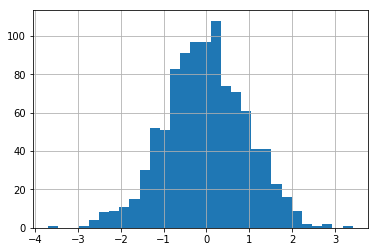

In [5]:
# Here we can see that it is calling matplotlib under the hood
df1['A'].hist(bins=30)

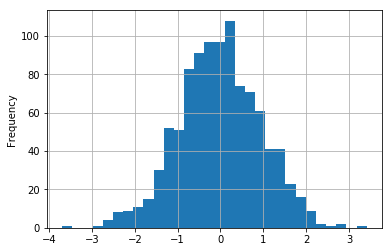

In [25]:
# Different plot types
df1['A'].plot(kind='hist', bins=30, grid=True)

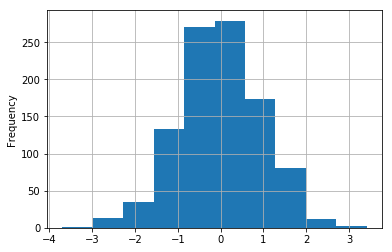

In [26]:
df1['A'].plot.hist(grid=True)

In [8]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


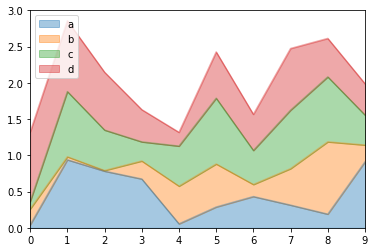

In [27]:
# alpha is for transparency
df2.plot.area(alpha=0.4)

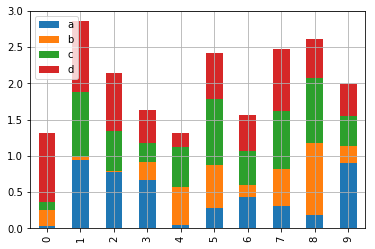

In [29]:
df2.plot.bar(stacked=True, grid=True)

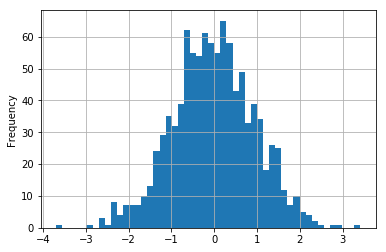

In [30]:
df1['A'].plot.hist(bins=50, grid=True)

In [12]:
ser = df1.index

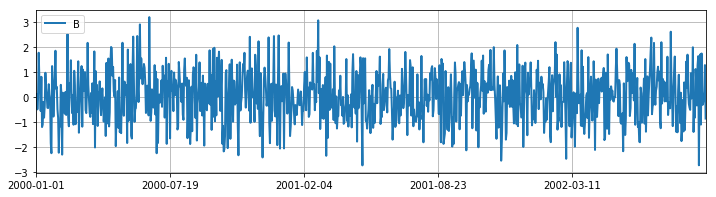

In [37]:
# For some reason, index wont work here - guess is that index is a string
df1.plot.line(y='B', figsize=(12,3), lw=2, grid=True)

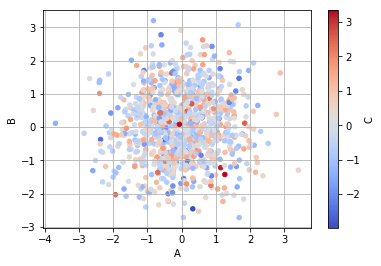

In [38]:
# c is for color of a given scatter point
df1.plot.scatter(x='A', y='B', c='C', cmap='coolwarm', grid=True)

/home/gabriel_v_tan/.local/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


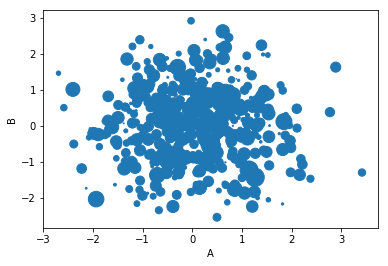

In [15]:
# s is for size of each scatter point
df1.plot.scatter(x='A', y='B', s=df1['C']*100)

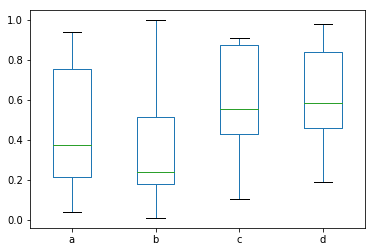

In [16]:
# box plots
df2.plot.box()

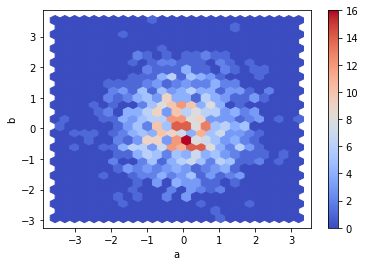

In [17]:
# hexagonal bin plot
df = pd.DataFrame(np.random.randn(1000,2), columns=['a','b'])
df.plot.hexbin(x='a', y='b', gridsize=25, cmap="coolwarm")

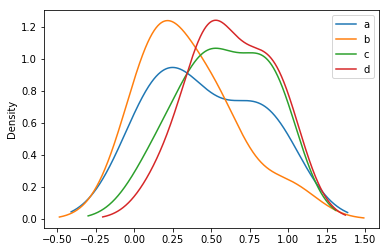

In [18]:
# kernel density estimation plots
df2.plot.kde()


# Pandas Time Series Visualization

In [3]:
import matplotlib.pyplot as plt

In [4]:
mcdon = pd.read_csv('mcdonalds.csv', index_col='Date', parse_dates=True)

In [5]:
mcdon.head()

,Adj. Close,Adj. Volume
Date,,
1970-01-02,0.209761,2825604.0
1970-01-05,0.213316,2210449.5
1970-01-06,0.214501,1951168.5
1970-01-07,0.213316,2728768.5
1970-01-08,0.213316,2242404.0


<IPython.core.display.Javascript object>


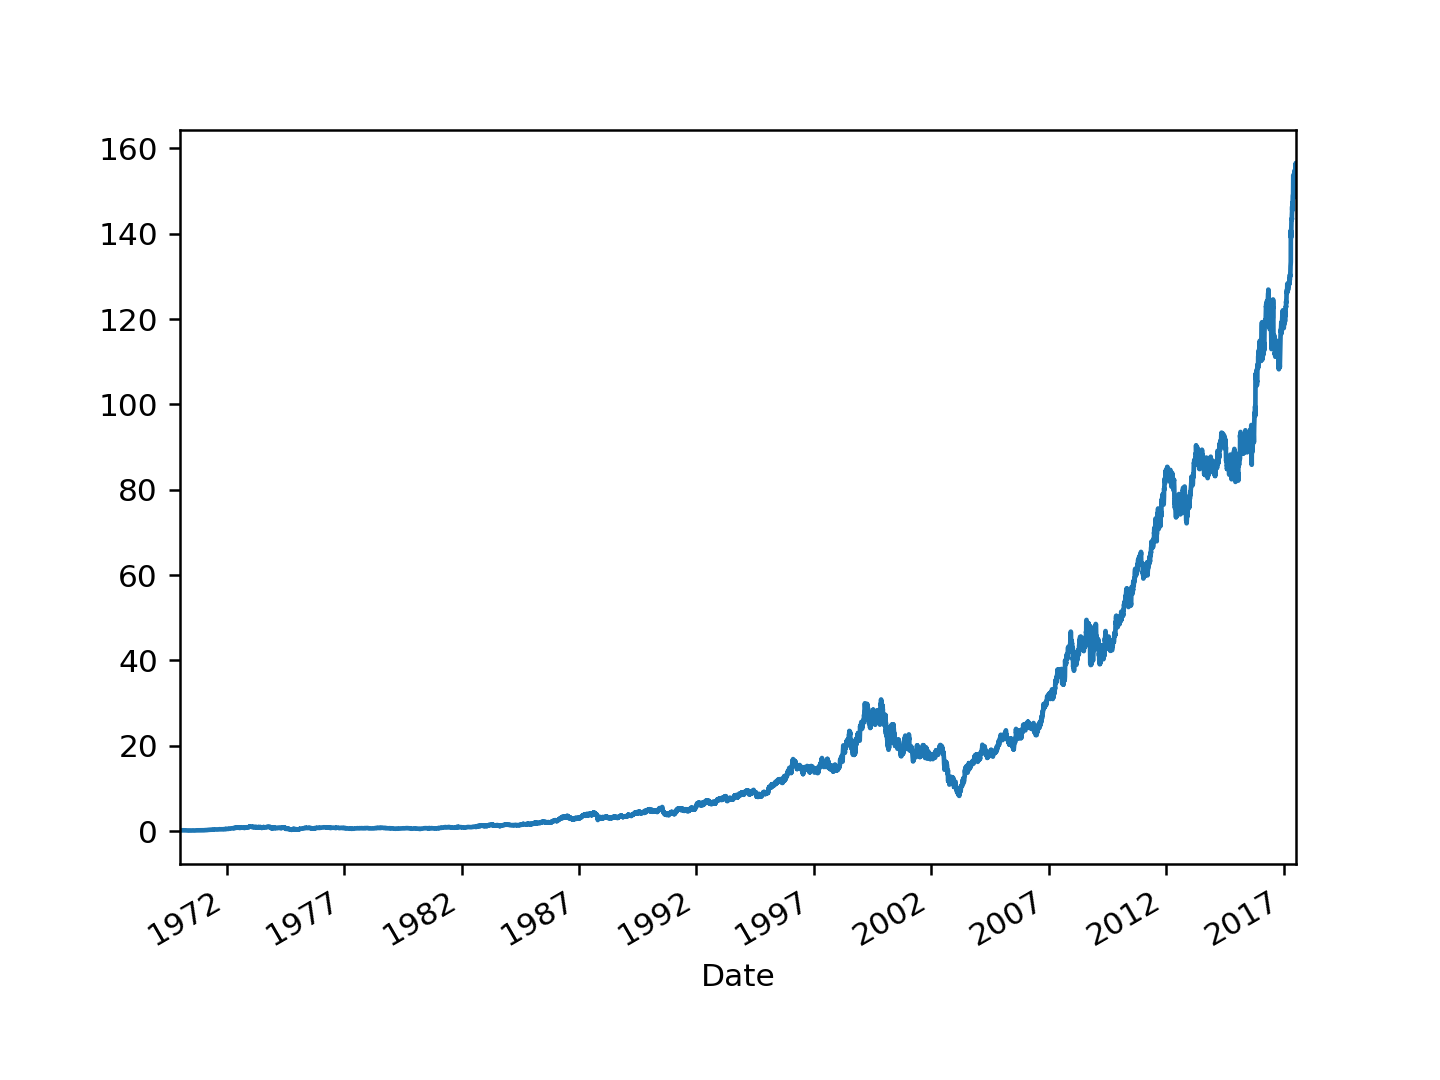

In [8]:
mcdon['Adj. Close'].plot()

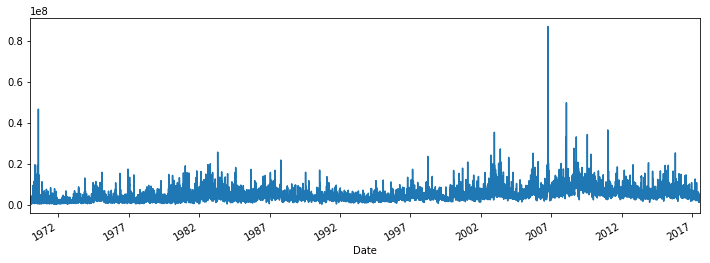

In [42]:
mcdon['Adj. Volume'].plot(figsize=(12,4))

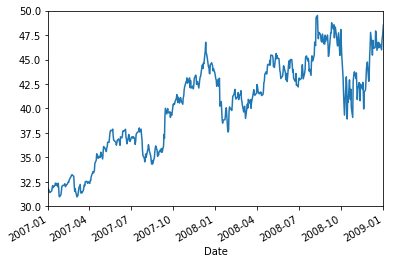

In [43]:
# have to set both xlim and ylim
# When we convert the index to datetime, we can use the string format as the xlims 
mcdon['Adj. Close'].plot(xlim=['2007-01-01','2009-01-01'], ylim=(30,50))

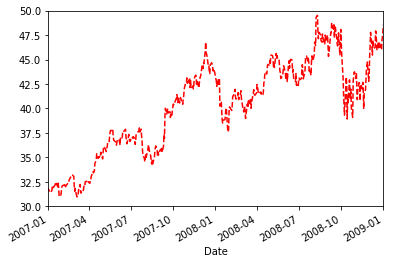

In [44]:
mcdon['Adj. Close'].plot(xlim=['2007-01-01','2009-01-01'], ylim=(30,50), ls='--', c='red')

In [45]:
import matplotlib.dates as dates

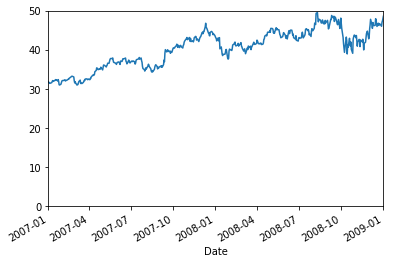

In [46]:
mcdon['Adj. Close'].plot(xlim=['2007-01-01','2009-01-01'], ylim=(0, 50))

In [51]:
# set the x ticks
idx = mcdon.loc['2007-01-01': '2007-05-01'].index

In [55]:
stock = mcdon.loc['2007-01-01': '2007-05-01']['Adj. Close']


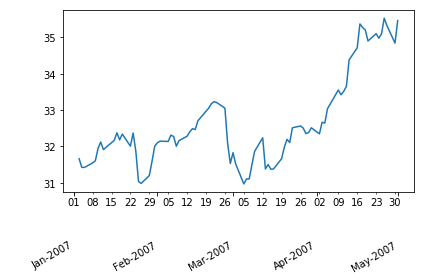

In [78]:
fig, ax = plt.subplots()
# Here we use 'plot_date' which specifically deals with datetime information
ax.plot_date(idx, stock, '-')

# here lets add grid lines on the y-axis and x-axis
# ax.yaxis.grid(True)
# ax.xaxis.grid(True)

# Let's edit the x-ticks but adjusting location and formating
# Check documentation for DateFormatter - tons of customization
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n\n%b-%Y')) # added extra lines here so that we can add a minor axis

# Now let's set the date for the minor axis
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Here we can automatically format the x-axis so that it fits appropriately with a given graph 
fig.autofmt_xdate()
plt.tight_layout()